# Basic Model

## Setup

In [1]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

In [2]:
%run setup.ipynb

## Model

In [3]:
# Load ResNet50
untrained_model = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model)

## Training

In [4]:
freeze_trained_model, info = train_model(model=untrained_model, optimizer=optimizer, num_epoch=40, train=dataloader_train)

Epoch 1/40
----------
Train Loss: 1.6777 Acc: 0.5737
Val Loss: 1.3171 Acc: 0.8077
Epoch time 1m 26s
----------

Epoch 2/40
----------
Train Loss: 1.2274 Acc: 0.8263
Val Loss: 0.9058 Acc: 0.8654
Epoch time 1m 29s
----------

Epoch 3/40
----------
Train Loss: 0.9837 Acc: 0.8671
Val Loss: 0.7390 Acc: 0.9519
Epoch time 1m 29s
----------

Epoch 4/40
----------
Train Loss: 0.8336 Acc: 0.8874
Val Loss: 0.6070 Acc: 0.9519
Epoch time 1m 29s
----------

Epoch 5/40
----------
Train Loss: 0.7294 Acc: 0.9054
Val Loss: 0.6414 Acc: 0.8750
Epoch time 1m 29s
----------

Epoch 6/40
----------
Train Loss: 0.6324 Acc: 0.9006
Val Loss: 0.5386 Acc: 0.9519
Epoch time 1m 29s
----------

Epoch 7/40
----------
Train Loss: 0.5998 Acc: 0.9102
Val Loss: 0.4667 Acc: 0.9808
Epoch time 1m 28s
----------

Epoch 8/40
----------
Train Loss: 0.5350 Acc: 0.9198
Val Loss: 0.3752 Acc: 0.9808
Epoch time 1m 28s
----------

Epoch 9/40
----------
Train Loss: 0.4925 Acc: 0.9329
Val Loss: 0.3429 Acc: 0.9712
Epoch time 1m 28s
----

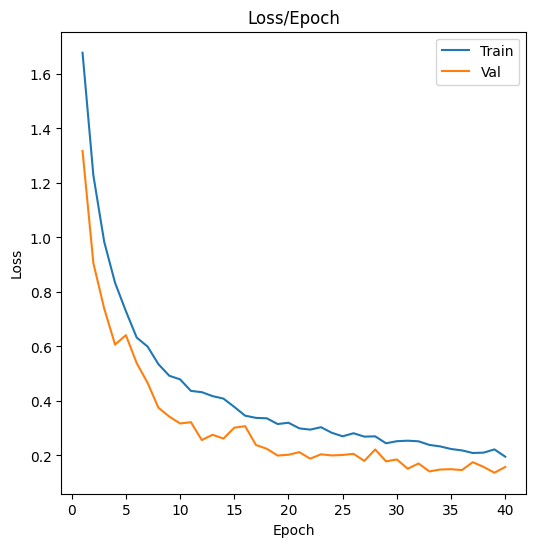

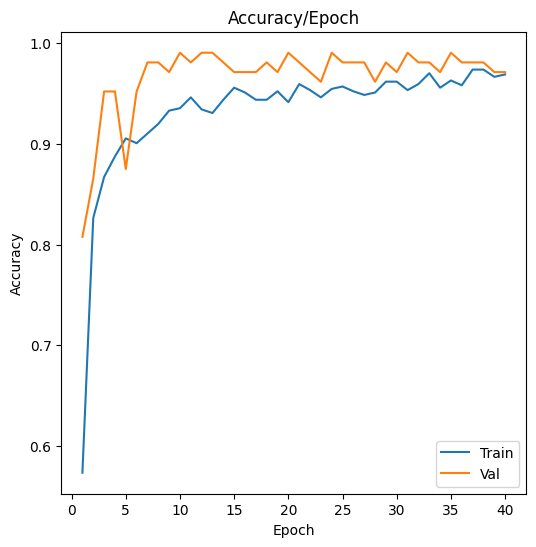

In [5]:
# Plot Loss
plot_loss(info["train_loss"], info["val_loss"], ["Train", "Val"])

# Plot Accuracy
plot_accuracies(info["train_acc"], info["val_acc"], ["Train", "Val"])

In [6]:
unfreeze_layers(freeze_trained_model)
model, model_info = train_model(model=freeze_trained_model, optimizer=optimizer, num_epoch=40, train=dataloader_train)

Epoch 1/40
----------
Train Loss: 0.2235 Acc: 0.9401
Val Loss: 0.0971 Acc: 0.9615
Epoch time 2m 47s
----------

Epoch 2/40
----------
Train Loss: 0.0885 Acc: 0.9784
Val Loss: 0.0618 Acc: 0.9808
Epoch time 2m 46s
----------

Epoch 3/40
----------
Train Loss: 0.0637 Acc: 0.9844
Val Loss: 0.0505 Acc: 0.9904
Epoch time 2m 46s
----------

Epoch 4/40
----------
Train Loss: 0.0476 Acc: 0.9844
Val Loss: 0.0414 Acc: 0.9904
Epoch time 2m 47s
----------

Epoch 5/40
----------
Train Loss: 0.0278 Acc: 0.9964
Val Loss: 0.0404 Acc: 0.9904
Epoch time 2m 46s
----------

Epoch 6/40
----------
Train Loss: 0.0203 Acc: 0.9976
Val Loss: 0.0322 Acc: 0.9904
Epoch time 2m 46s
----------

Epoch 7/40
----------
Train Loss: 0.0194 Acc: 0.9964
Val Loss: 0.0248 Acc: 0.9904
Epoch time 2m 47s
----------

Epoch 8/40
----------
Train Loss: 0.0157 Acc: 1.0000
Val Loss: 0.0443 Acc: 0.9808
Epoch time 2m 48s
----------

Epoch 9/40
----------
Train Loss: 0.0113 Acc: 0.9988
Val Loss: 0.0269 Acc: 0.9904
Epoch time 2m 48s
----

## Results

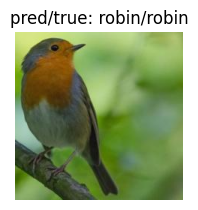

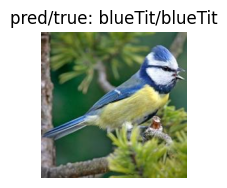

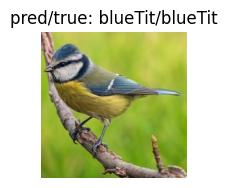

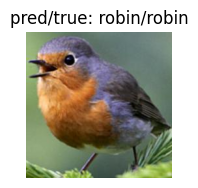

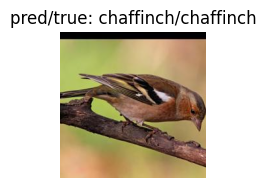

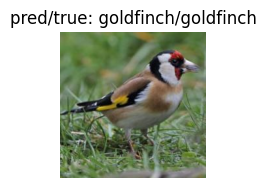

In [7]:
visualize_model(model, dataloader_validation, class_labels, device)

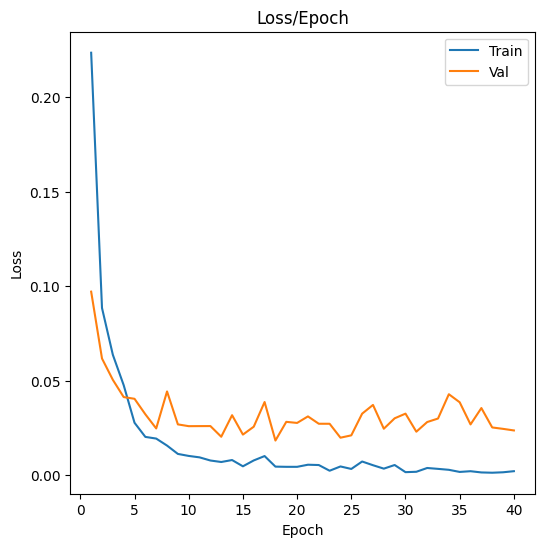

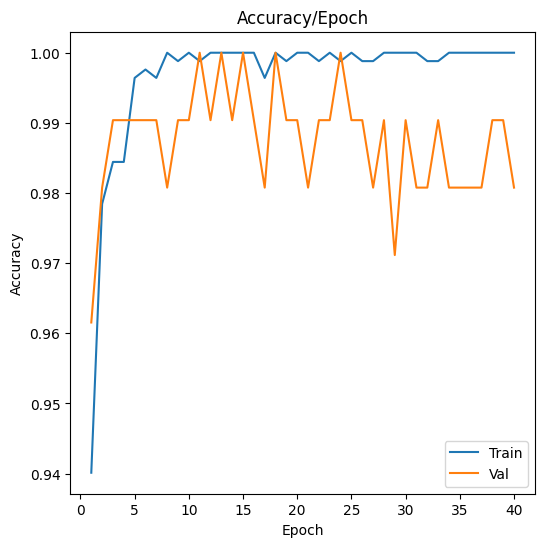

In [8]:
# Plot Loss
plot_loss(model_info["train_loss"], model_info["val_loss"], ["Train", "Val"])

# Plot Accuracy
plot_accuracies(model_info["train_acc"], model_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  2  0 13  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 98.09523809523809


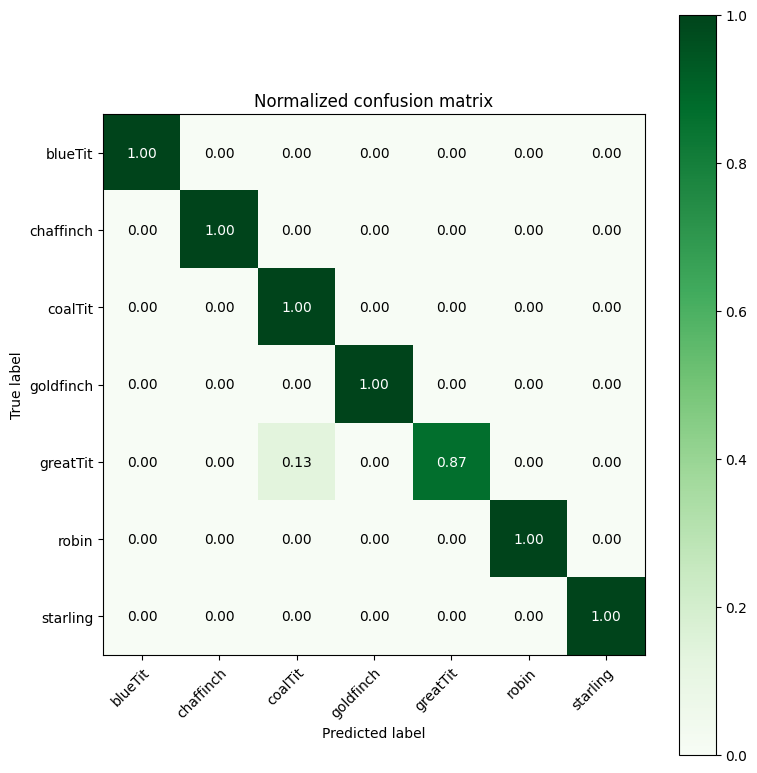

In [10]:
truel, predl = makeAll(dataloader_test, model, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [11]:
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.88      1.00      0.94        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.87      0.93        15
       robin       1.00      1.00      1.00        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

